## DATA 601 Project-2

<br>

For your second project, you will be working on the flights dataset that we used earlier. <br>
We have 5 csv files and 5 Excel files. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY daily weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer the following questions or complete the tasks <br>

#### Question/Task 1
a. Calculate the total number of seats for all the planned flights for each destination separately? <br>
b. What is the day of the year with the highest number of flights? <br>
c. What is the day of the year with the highest number of seats available on that day? <br>

#### Question/Task 2
a. What day of the year most cancellations happened? <br>
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).<br>
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?<br>
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)<br>


For the next group of questions/tasks, do not include the cancelled flights.

#### Question/Task 3
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.<br>
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)<br>
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?<br>
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)<br>
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) <br>
f. What day of the week we had the highest average delay?<br>
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?<br>
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. <br>
<br>

#### Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy. 

#### Question/Task 5
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [292]:
import pandas as pd
import math

In [293]:
flights_df=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights2DCMDVA.xlsx')
airlines_df=pd.read_csv('https://raw.githubusercontent.com/Praveen91004/Data601/main/airlines.csv')
airports_df=pd.read_csv('https://raw.githubusercontent.com/Praveen91004/Data601/main/airports.csv')
planes_df=pd.read_csv('https://raw.githubusercontent.com/Praveen91004/Data601/main/planes.csv')
weatherNYhourly_df=pd.read_csv('https://raw.githubusercontent.com/Praveen91004/Data601/main/weatherNYhourly.csv')
weatherMDdaily_df=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/weatherMDdaily.xlsx')
weatherNYdaily_df=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/weatherNYdaily.xlsx')
federal_holidays_df=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/federalHolidays2013.xlsx')
flights_test_data_df=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights_test_data.xlsx')

In [294]:
merged_data=pd.merge(flights_df,planes_df,how="left",on='tailnum')
merged_data

,year_x,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,...,hour,minute,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,...,6.0,29.0,2007.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,...,8.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,...,10.0,59.0,1990.0,Fixed wing multi engine,BOEING,737-5H4,2.0,149.0,NaN,Turbo-jet
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,...,11.0,58.0,2000.0,Fixed wing multi engine,BOEING,737-7H4,2.0,140.0,NaN,Turbo-fan
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,...,13.0,16.0,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2.0,55.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,...,11.0,5.0,1998.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2B19,2.0,55.0,NaN,Turbo-fan
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,...,14.0,6.0,1997.0,Fixed wing multi engine,CANADAIR,CL-600-2B19,2.0,55.0,NaN,Turbo-fan
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,...,14.0,30.0,2003.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2C10,2.0,80.0,NaN,Turbo-fan
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,...,14.0,47.0,2001.0,Fixed wing multi engine,BOMBARDIER INC,CL-600-2B19,2.0,55.0,NaN,Turbo-fan


In [295]:
merged_data_duplicate=merged_data

In [296]:
merged_data_duplicate1=merged_data

**Question/Task 1**
a. Calculate the total number of seats for all the planned flights for each destination separately?
b. What is the day of the year with the highest number of flights
c. What is the day of the year with the highest number of seats available on that day?

In [297]:
#a. Calculate the total number of seats for all the planned flights for each destination separately?
merged_data.groupby(['dest'])['seats'].sum().reset_index()

,dest,seats
0,BWI,96135.0
1,DCA,906225.0
2,IAD,296004.0


In [298]:
#b. What is the day of the year with the highest number of flights?
merged_data['date'] = merged_data['year_x'].astype(str)+'-' + merged_data['month'].astype(str) + '-' + merged_data['day'].astype(str)
merged_data['date'] = pd.to_datetime(merged_data['date'])
flight_counts = merged_data.groupby('date')['flight'].count()
highest_no_of_flights = flight_counts.sort_values(ascending=False).head(3).reset_index()
print(highest_no_of_flights)
print("days with highest number of flights are 2013-01-17 and 2013-01-11")

        date  flight
0 2013-01-17      61
1 2013-01-11      61
2 2013-01-30      60
days with highest number of flights are 2013-01-17 and 2013-01-11


In [299]:
#c. What is the day of the year with the highest number of seats available on that day?
print(merged_data.groupby(['date'])['seats'].sum().reset_index().sort_values(by='seats',ascending=False).head(1))
print("2013-02-28 is the day with highest number of seats")

         date   seats
58 2013-02-28  5379.0
2013-02-28 is the day with highest number of seats


**Question 2**
a. What day of the year most cancellations happened?
b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).
c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).
d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?
e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)

For the next group of questions/tasks, do not include the cancelled flights.

In [300]:
#a. What day of the year most cancellations happened?
cancelled_flights = merged_data[merged_data['dep_time'].isna()].fillna('cancelled')
cancelled_flights = cancelled_flights.groupby(['date'])['dep_time'].count().reset_index()
cancelled_flights = cancelled_flights.sort_values(by='dep_time', ascending=False).head(1)
print(cancelled_flights)
print("most flights cancelled on 2013-03-06")

         date  dep_time
44 2013-03-06        46
most flights cancelled on 2013-03-06


In [301]:
#b. Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).
merged_data['cancellation']=merged_data['dep_time'].apply(lambda x: 1 if math.isnan(x) else 0)


In [302]:
date_wise_cancelaltion=merged_data.groupby(['date'])['cancellation'].sum().reset_index().sort_values(by='cancellation',ascending=False)
date_wise_cancelaltion

,date,cancellation
64,2013-03-06,46
38,2013-02-08,33
254,2013-09-12,25
66,2013-03-08,23
142,2013-05-23,21
...,...,...
184,2013-07-04,0
185,2013-07-05,0
195,2013-07-15,0
196,2013-07-16,0


In [303]:
merged_cancellation_data_MD=pd.merge(date_wise_cancelaltion,weatherMDdaily_df, left_on='date',right_on='Date')
merged_cancellation_data_MD

,date,cancellation,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,46,2013-03-06,40,33,0.75,T,T
1,2013-02-08,33,2013-02-08,42,33,0.24,0,0
2,2013-09-12,25,2013-09-12,89,70,0.65,0,0
3,2013-03-08,23,2013-03-08,49,33,0,0,0
4,2013-05-23,21,2013-05-23,80,65,0.99,0,0
...,...,...,...,...,...,...,...,...
360,2013-07-04,0,2013-07-04,88,73,T,0,0
361,2013-07-05,0,2013-07-05,89,74,0,0,0
362,2013-07-15,0,2013-07-15,95,72,0,0,0
363,2013-07-16,0,2013-07-16,95,75,0,0,0


In [304]:
merged_cancellation_data_MD[['Precipitation', 'Snowfall', 'Snow Depth']] = merged_cancellation_data_MD[['Precipitation', 'Snowfall', 'Snow Depth']].replace('T', '0')
merged_cancellation_data_MD[['Precipitation', 'Snowfall', 'Snow Depth']] = merged_cancellation_data_MD[['Precipitation', 'Snowfall', 'Snow Depth']].astype(float)
merged_cancellation_data_MD

,date,cancellation,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,46,2013-03-06,40,33,0.75,0.0,0.0
1,2013-02-08,33,2013-02-08,42,33,0.24,0.0,0.0
2,2013-09-12,25,2013-09-12,89,70,0.65,0.0,0.0
3,2013-03-08,23,2013-03-08,49,33,0.00,0.0,0.0
4,2013-05-23,21,2013-05-23,80,65,0.99,0.0,0.0
...,...,...,...,...,...,...,...,...
360,2013-07-04,0,2013-07-04,88,73,0.00,0.0,0.0
361,2013-07-05,0,2013-07-05,89,74,0.00,0.0,0.0
362,2013-07-15,0,2013-07-15,95,72,0.00,0.0,0.0
363,2013-07-16,0,2013-07-16,95,75,0.00,0.0,0.0


In [305]:
from scipy.stats import pearsonr
corr, p= pearsonr(merged_cancellation_data_MD['Max Temp'], merged_cancellation_data_MD['cancellation'])
print('Pearsons correlation Max Temp: %.3f' % p)

corr, p= pearsonr(merged_cancellation_data_MD['Min Temp'], merged_cancellation_data_MD['cancellation'])
print('Pearsons correlation Min Temp: %.3f' % p) 

corr, p = pearsonr(merged_cancellation_data_MD['Precipitation'], merged_cancellation_data_MD['cancellation'])
print('Pearsons correlation Precipitation: %.3f' % p)

corr, p= pearsonr(merged_cancellation_data_MD['Snowfall'], merged_cancellation_data_MD['cancellation'])
print('Pearsons correlation Snowfall: %.3f' % p)

corr, p= pearsonr(merged_cancellation_data_MD['Snow Depth'], merged_cancellation_data_MD['cancellation'])
print('Pearsons correlation Snow Depth: %.3f' % p)


Pearsons correlation Max Temp: 0.977
Pearsons correlation Min Temp: 0.184
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.012
Pearsons correlation Snow Depth: 0.765


There is a high positive correlation (0.977) between Max Temp and cancellation, and between Snow Depth(0.765) and cancellation which suggests that flights are more likely to be cancelled on days when the maximum temperature is higher and also when there is a higher snow depth.

There is only a weak positive correlation (0.184) between Min Temp and cancellation, suggesting that the minimum temperature has little effect on flight cancellations.

The Precipitation variable has a very low correlation coefficient (0.000), indicating that there is no significant correlation between precipitation and flight cancellations. Similarly, the Snowfall variable has a very weak positive correlation (0.012), indicating that there is little relationship between snowfall and flight cancellations.

In [306]:
merged_cancellation_data_NY=pd.merge(date_wise_cancelaltion,weatherNYdaily_df, left_on='date',right_on='Date')
merged_cancellation_data_NY[['Precipitation', 'Snowfall', 'Snow Depth']] = merged_cancellation_data_NY[['Precipitation', 'Snowfall', 'Snow Depth']].replace(' T', '0')
merged_cancellation_data_NY[['Precipitation', 'Snowfall', 'Snow Depth']] = merged_cancellation_data_NY[['Precipitation', 'Snowfall', 'Snow Depth']].astype(float)
merged_cancellation_data_NY


,date,cancellation,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-03-06,46,2013-03-06,45,35,0.00,0.0,0.0
1,2013-02-08,33,2013-02-08,36,27,0.78,2.9,0.0
2,2013-09-12,25,2013-09-12,82,70,0.29,0.0,0.0
3,2013-03-08,23,2013-03-08,40,31,0.27,3.0,1.0
4,2013-05-23,21,2013-05-23,71,61,0.03,0.0,0.0
...,...,...,...,...,...,...,...,...
360,2013-07-04,0,2013-07-04,84,72,0.00,0.0,0.0
361,2013-07-05,0,2013-07-05,87,73,0.00,0.0,0.0
362,2013-07-15,0,2013-07-15,97,77,0.00,0.0,0.0
363,2013-07-16,0,2013-07-16,96,78,0.00,0.0,0.0


In [307]:
from scipy.stats import pearsonr
corr, p= pearsonr(merged_cancellation_data_NY['Max Temp'], merged_cancellation_data_NY['cancellation'])
print('Pearsons correlation Max Temp: %.3f' % p)

corr, p = pearsonr(merged_cancellation_data_NY['Min Temp'], merged_cancellation_data_NY['cancellation'])
print('Pearsons correlation Min Temp: %.3f' % p) 

corr, p = pearsonr(merged_cancellation_data_NY['Precipitation'], merged_cancellation_data_NY['cancellation'])
print('Pearsons correlation Precipitation: %.3f' % p)

corr, p = pearsonr(merged_cancellation_data_NY['Snowfall'], merged_cancellation_data_NY['cancellation'])
print('Pearsons correlation Snowfall: %.3f' % p)

corr, p = pearsonr(merged_cancellation_data_NY['Snow Depth'], merged_cancellation_data_NY['cancellation'])
print('Pearsons correlation Snow Depth: %.3f' % p)


Pearsons correlation Max Temp: 0.473
Pearsons correlation Min Temp: 0.626
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.000
Pearsons correlation Snow Depth: 0.000


There is a moderate positive correlation (0.473) between Max Temp and cancellation, suggesting that flights are more likely to be canceled on days when the maximum temperature is higher. Similarly, there is a moderate positive correlation (0.626) between Min Temp and cancellation, indicating that the minimum temperature also has a significant effect on flight cancellations.

However, the Precipitation, Snowfall, and Snow Depth variables have a correlation coefficient of 0.000, indicating that there is no significant correlation between these weather variables and flight cancellations.


In [308]:
#c. Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with a statistical model (hypothesis testing).
federal_holidays_df.columns = federal_holidays_df.iloc[0]
federal_holidays_df = federal_holidays_df[1:]
federal_holidays_df = federal_holidays_df.drop(federal_holidays_df.tail(1).index)
federal_holidays_df = federal_holidays_df.rename(columns={'Date': 'date'})
federal_holidays_df = federal_holidays_df.rename(columns={'Federal holiday': 'holiday'})
federal_holidays_df['date'] = pd.to_datetime(federal_holidays_df['date'])
federal_holidays_df

,date,holiday,Day of the week
1,2013-01-01,New Year's Day,Tuesday
2,2013-01-21,Martin Luther King Day,Monday
3,2013-02-18,Presidents' Day,Monday
4,2013-05-27,Memorial Day,Monday
5,2013-07-04,Independence Day,Thursday
6,2013-09-02,Labor Day,Monday
7,2013-10-14,Columbus Day,Monday
8,2013-11-11,Veterans Day,Monday
9,2013-11-28,Thanksgiving Day,Thursday
10,2013-12-25,Christmas Day,Wednesday


In [309]:

from scipy.stats import ttest_ind


# merge the data
holiday_cancelaltion = pd.merge(federal_holidays_df,date_wise_cancelaltion, how='right')
holiday_cancelaltion=holiday_cancelaltion.fillna(0)
holiday_cancelaltion.loc[holiday_cancelaltion.holiday!=0,'holiday']=1
holiday_cancelaltion_1=holiday_cancelaltion

fedaralholiday_cancelations=holiday_cancelaltion.loc[holiday_cancelaltion['holiday'] == 1, 'cancellation'].mean()
non_fedaralholiday_cancelations=holiday_cancelaltion.loc[holiday_cancelaltion['holiday'] == 0, 'cancellation'].mean()

#perform the t-test
t, p = ttest_ind(holiday_cancelaltion.loc[holiday_cancelaltion['holiday'] == 1, 'cancellation'], holiday_cancelaltion.loc[holiday_cancelaltion['holiday'] == 0, 'cancellation'], equal_var=False)

print('Mean cancellations on Federal Holidays:', fedaralholiday_cancelations)
print('Mean cancellations on non-Federal Holidays:', non_fedaralholiday_cancelations)
print('t-value:', t)
print('p-value:', p)
print('As p-value of the t-test is greater than the significance level, we fail to reject the null hypothesis and we can conclude that there is no significant difference in the mean number of cancellations between Federal Holidays and non-Federal Holidays. This would suggest that there is no relationship between Federal Holidays and cancellations')

Mean cancellations on Federal Holidays: 1.2
Mean cancellations on non-Federal Holidays: 2.611267605633803
t-value: -1.7037459279483824
p-value: 0.11623146815830888
As p-value of the t-test is greater than the significance level, we fail to reject the null hypothesis and we can conclude that there is no significant difference in the mean number of cancellations between Federal Holidays and non-Federal Holidays. This would suggest that there is no relationship between Federal Holidays and cancellations


In [310]:
#d. What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?
cancelled_flights = merged_data[merged_data['cancellation'] == 1]
total_seats_cancelled = cancelled_flights['seats'].sum()
total_economic_loss = total_seats_cancelled * 50

print(f"The total number of seats for the cancelled flights is: {total_seats_cancelled}")
print(f"The total economic loss is: {total_economic_loss} dollars")

The total number of seats for the cancelled flights is: 24032.0
The total economic loss is: 1201600.0 dollars


In [311]:
#e. Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)
cancelled_flights_by_airlines = merged_data.groupby('carrier')['cancellation'].sum()
planned_flights_by_airlines = merged_data.groupby('carrier')['flight'].count()
ratio=cancelled_flights_by_airlines/planned_flights_by_airlines
print(ratio.sort_values())
print("The most reliable airline companies are DL (Delta Air Lines Inc.),OO (SkyWest Airlines Inc.) and UA (United Air Lines Inc.) ")
print("The least reliable airline company is YV (Mesa Airlines Inc.)")

carrier
DL    0.000000
OO    0.000000
UA    0.000000
B6    0.011852
WN    0.038462
US    0.048620
9E    0.055556
MQ    0.058340
EV    0.060393
YV    0.102894
dtype: float64
The most reliable airline companies are DL (Delta Air Lines Inc.),OO (SkyWest Airlines Inc.) and UA (United Air Lines Inc.) 
The least reliable airline company is YV (Mesa Airlines Inc.)


**Question/Task 3**
a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.
b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing)
c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)
e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)
f. What day of the week we had the highest average delay?
g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
h. Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.

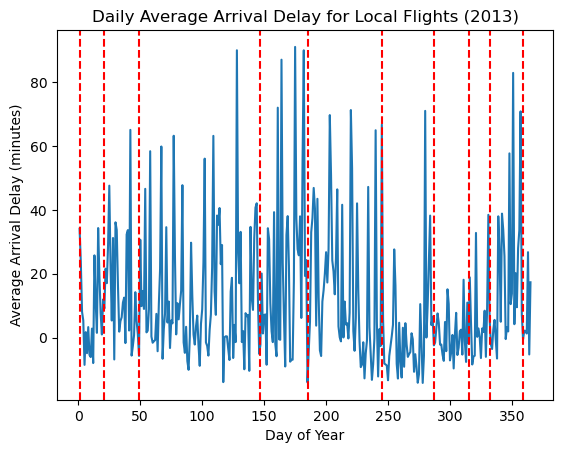

In [312]:
#a. Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.
# Convert date columns to datetime objects
import datetime
import pandas as pd
import matplotlib.pyplot as plt

merged_data_duplicate1['date'] = merged_data_duplicate1['year_x'].astype(str)+'-' + merged_data_duplicate1['month'].astype(str) + '-' + merged_data_duplicate1['day'].astype(str)
merged_data['date'] = pd.to_datetime(merged_data['date'])

# Calculate daily average arrival delay
daily_avg_delay = merged_data_duplicate1.groupby("date")["arr_delay"].mean()

# Get federal holidays
holidays = [
    datetime.date(2013, 1, 1),   # New Year's Day
    datetime.date(2013, 1, 21),  # Martin Luther King Jr. Day
    datetime.date(2013, 2, 18),  # Presidents' Day
    datetime.date(2013, 5, 27),  # Memorial Day
    datetime.date(2013, 7, 4),   # Independence Day
    datetime.date(2013, 9, 2),   # Labor Day
    datetime.date(2013, 10, 14), # Columbus Day
    datetime.date(2013, 11, 11), # Veterans Day
    datetime.date(2013, 11, 28), # Thanksgiving Day
    datetime.date(2013, 12, 25), # Christmas Day
]

# Create figure and axis
fig, ax = plt.subplots()

# Plot daily average delay
ax.plot(daily_avg_delay.index.dayofyear, daily_avg_delay.values)

# Add vertical lines for federal holidays
for holiday in holidays:
    ax.axvline(holiday.timetuple().tm_yday, color='red', linestyle='--')

# Set x-axis label
ax.set_xlabel("Day of Year")

# Set y-axis label
ax.set_ylabel("Average Arrival Delay (minutes)")

# Set plot title
ax.set_title("Daily Average Arrival Delay for Local Flights (2013)")

# Show plot
plt.show()


In [313]:
#b. Is there a correlation between the weather datasets and daily average arrival delay? Justify your answer with a statistical model (hypothesis testing) 
delay_data_df=merged_data_duplicate.groupby('date')['arr_delay'].mean().reset_index()
delay_data_df['day_of_year'] = delay_data_df['date'].dt.dayofyear
merge_daily_avg_delay_weather_MD=pd.merge(delay_data_df,weatherMDdaily_df,left_on='date',right_on='Date',how='left')

In [314]:
merge_daily_avg_delay_weather_MD[['Precipitation', 'Snowfall', 'Snow Depth']] = merge_daily_avg_delay_weather_MD[['Precipitation', 'Snowfall', 'Snow Depth']].replace('T', '0')
merge_daily_avg_delay_weather_MD

,date,arr_delay,day_of_year,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,34.075000,1,2013-01-01,44,34,0,0,0
1,2013-01-02,23.702128,2,2013-01-02,37,26,0,0,0
2,2013-01-03,8.040816,3,2013-01-03,38,22,0,0,0
3,2013-01-04,5.326531,4,2013-01-04,42,23,0,0,0
4,2013-01-05,-8.538462,5,2013-01-05,43,31,0,0,0
...,...,...,...,...,...,...,...,...,...
360,2013-12-27,2.090909,361,2013-12-27,49,22,0,0,0
361,2013-12-28,1.272727,362,2013-12-28,58,28,0,0,0
362,2013-12-29,26.740741,363,2013-12-29,47,39,1.09,0,0
363,2013-12-30,-5.275862,364,2013-12-30,47,32,0,0,0


In [315]:
from scipy.stats import pearsonr
corr, p= pearsonr(merge_daily_avg_delay_weather_MD['Max Temp'], merge_daily_avg_delay_weather_MD['arr_delay'])
print('Pearsons correlation Max Temp: %.3f' % p)

corr, p = pearsonr(merge_daily_avg_delay_weather_MD['Min Temp'], merge_daily_avg_delay_weather_MD['arr_delay'])
print('Pearsons correlation Min Temp: %.3f' % p) 

corr, p = pearsonr(merge_daily_avg_delay_weather_MD['Precipitation'], merge_daily_avg_delay_weather_MD['arr_delay'])
print('Pearsons correlation Precipitation: %.3f' % p)

corr, p = pearsonr(merge_daily_avg_delay_weather_MD['Snowfall'], merge_daily_avg_delay_weather_MD['arr_delay'])
print('Pearsons correlation Snowfall: %.3f' % p)

corr, p = pearsonr(merge_daily_avg_delay_weather_MD['Snow Depth'], merge_daily_avg_delay_weather_MD['arr_delay'])
print('Pearsons correlation Snow Depth: %.3f' % p)

Pearsons correlation Max Temp: 0.331
Pearsons correlation Min Temp: 0.001
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.008
Pearsons correlation Snow Depth: 0.054


There is a weak positive correlation between the Max Temp and daily average arrival delay, this suggest that maximum temperature has a slight effect on daily average delays. Whereas Min Temp, Precipitation, Snowfall, and Snow Depth has no correlation with daily average delays.

In [316]:
merge_daily_avg_delay_weather_NY=pd.merge(delay_data_df,weatherNYdaily_df,left_on='date',right_on='Date',how='left')
merge_daily_avg_delay_weather_NY[['Precipitation', 'Snowfall', 'Snow Depth']] = merge_daily_avg_delay_weather_NY[['Precipitation', 'Snowfall', 'Snow Depth']].replace(' T', '0')
merge_daily_avg_delay_weather_NY

,date,arr_delay,day_of_year,Date,Max Temp,Min Temp,Precipitation,Snowfall,Snow Depth
0,2013-01-01,34.075000,1,2013-01-01,41,27,0,0,0
1,2013-01-02,23.702128,2,2013-01-02,35,23,0,0,0
2,2013-01-03,8.040816,3,2013-01-03,33,25,0,0,0
3,2013-01-04,5.326531,4,2013-01-04,39,30,0,0,0
4,2013-01-05,-8.538462,5,2013-01-05,45,32,0,0,0
...,...,...,...,...,...,...,...,...,...
360,2013-12-27,2.090909,361,2013-12-27,42,31,0,0,0
361,2013-12-28,1.272727,362,2013-12-28,53,31,0,0,0
362,2013-12-29,26.740741,363,2013-12-29,49,38,1.18,0,0
363,2013-12-30,-5.275862,364,2013-12-30,47,24,0,0,0


In [317]:
from scipy.stats import pearsonr
corr, p= pearsonr(merge_daily_avg_delay_weather_NY['Max Temp'], merge_daily_avg_delay_weather_NY['arr_delay'])
print('Pearsons correlation Max Temp: %.3f' % p)

corr, p = pearsonr(merge_daily_avg_delay_weather_NY['Min Temp'], merge_daily_avg_delay_weather_NY['arr_delay'])
print('Pearsons correlation Min Temp: %.3f' % p) 

corr, p = pearsonr(merge_daily_avg_delay_weather_NY['Precipitation'], merge_daily_avg_delay_weather_NY['arr_delay'])
print('Pearsons correlation Precipitation: %.3f' % p)

corr, p = pearsonr(merge_daily_avg_delay_weather_NY['Snowfall'], merge_daily_avg_delay_weather_NY['arr_delay'])
print('Pearsons correlation Snowfall: %.3f' % p)

corr, p= pearsonr(merge_daily_avg_delay_weather_NY['Snow Depth'], merge_daily_avg_delay_weather_NY['arr_delay'])
print('Pearsons correlation Snow Depth: %.3f' % p)

Pearsons correlation Max Temp: 0.888
Pearsons correlation Min Temp: 0.067
Pearsons correlation Precipitation: 0.000
Pearsons correlation Snowfall: 0.000
Pearsons correlation Snow Depth: 0.135


The Max Temp(0.888) of New York has a strong positive correlation with daily average delays which suggest that Max Temp have an effect on average daily delays. Whereas, Min Temp, Precipitation, Snowfall, and Snow Depth has no correlation with daily average delays.

In [318]:
#c. Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
holiday_cancelaltion_1
#holiday_cancelaltion_1.drop('cancellation', axis=1, inplace=True)
holiday_cancelaltion_1
merge_delay_data_holiday_cancellation=pd.merge(holiday_cancelaltion_1,delay_data_df,how='right')
corr, p = pearsonr(merge_delay_data_holiday_cancellation['arr_delay'], merge_delay_data_holiday_cancellation['holiday'])
print("Correlation coefficient: ", corr)
print("P value: ", p)
print("There is no relation between Federal Holiday Schedule and daily average arrival delay")

Correlation coefficient:  -0.02325520181559404
P value:  0.6578916276936498
There is no relation between Federal Holiday Schedule and daily average arrival delay


In [319]:
#d. Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)
# Calculate average arrival delay for each airport
average_delay = merged_data_duplicate.groupby("dest")["arr_delay"].mean().sort_values()

# Most reliable airport (shortest average delay)
most_reliable = average_delay.idxmin()

# Least reliable airport (longest average delay)
least_reliable = average_delay.idxmax()

print("Most Reliable Airport (Shortest Average Delay):", most_reliable)
print("Least Reliable Airport (Longest Average Delay):", least_reliable)
print("\nAverage Arrival Delay for Each Airport:")
print(average_delay)


Most Reliable Airport (Shortest Average Delay): DCA
Least Reliable Airport (Longest Average Delay): IAD

Average Arrival Delay for Each Airport:
dest
DCA     9.069106
BWI    10.745552
IAD    13.866071
Name: arr_delay, dtype: float64


In [320]:
#e. Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)
average_delay = merged_data_duplicate.groupby("carrier")["arr_delay"].mean().sort_values()

# Most reliable airline (shortest average delay)
most_reliable = average_delay.idxmin()

# Least reliable airline (longest average delay)
least_reliable = average_delay.idxmax()

print("Most Reliable Airline (Shortest Average Delay):", most_reliable)
print("Least Reliable Airline (Longest Average Delay):", least_reliable)
print("\nAverage Arrival Delay for Each Airline:")
print(average_delay)


Most Reliable Airline (Shortest Average Delay): DL
Least Reliable Airline (Longest Average Delay): YV

Average Arrival Delay for Each Airline:
carrier
DL    -8.000000
UA    -7.666667
OO     3.000000
9E     3.612890
WN     4.915000
US     5.829000
MQ    10.995401
B6    12.805097
EV    17.359776
YV    18.917266
Name: arr_delay, dtype: float64


In [321]:
#f. What day of the week we had the highest average delay?

# Calculate average arrival delay for each day of the week
average_delay_by_day = merged_data_duplicate.groupby(merged_data_duplicate["date"].dt.dayofweek)["arr_delay"].mean()

# Find the day of the week with the highest average delay
highest_delay_day = average_delay_by_day.idxmax()

# Get the day name corresponding to the highest delay day
highest_delay_day_name = pd.Timestamp(0).day_name()  # Initialize with Monday as default
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
if highest_delay_day in range(7):
    highest_delay_day_name = day_names[highest_delay_day]

print("Day of the Week with the Highest Average Delay:", highest_delay_day_name)
print("Average Delay for Each Day of the Week:")
print(average_delay_by_day)

Day of the Week with the Highest Average Delay: Monday
Average Delay for Each Day of the Week:
date
0    15.433646
1    10.414121
2    11.315916
3    12.458195
4    13.068331
5     3.956917
6     6.571429
Name: arr_delay, dtype: float64


In [322]:
#g. Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
# Convert departure time to datetime objects
merged_data_duplicate["dep_time"] = pd.to_datetime(merged_data_duplicate["dep_time"], format="%H%M", errors="coerce")

# Define time periods
morning_period = (merged_data_duplicate["dep_time"].dt.hour >= 6) & (merged_data_duplicate["dep_time"].dt.hour <= 10)
noon_period = (merged_data_duplicate["dep_time"].dt.hour >= 11) & (merged_data_duplicate["dep_time"].dt.hour <= 14)
afternoon_period = (merged_data_duplicate["dep_time"].dt.hour >= 15) & (merged_data_duplicate["dep_time"].dt.hour <= 17)
evening_period = (merged_data_duplicate["dep_time"].dt.hour >= 18) & (merged_data_duplicate["dep_time"].dt.hour <= 22)

# Calculate average delay for each time period
average_delay_morning = merged_data_duplicate[morning_period]["dep_delay"].mean()
average_delay_noon = merged_data_duplicate[noon_period]["dep_delay"].mean()
average_delay_afternoon = merged_data_duplicate[afternoon_period]["dep_delay"].mean()
average_delay_evening = merged_data_duplicate[evening_period]["dep_delay"].mean()

# Find the time period with the highest average delay
max_average_delay = max(average_delay_morning, average_delay_noon, average_delay_afternoon, average_delay_evening)
if max_average_delay == average_delay_morning:
    highest_delay_period = "Morning (6 am to 10 am)"
elif max_average_delay == average_delay_noon:
    highest_delay_period = "Noon (11 am to 2 pm)"
elif max_average_delay == average_delay_afternoon:
    highest_delay_period = "Afternoon (3 pm to 5 pm)"
else:
    highest_delay_period = "Evening (6 pm to 10 pm)"

print("Time Period with the Highest Average Delay:", highest_delay_period)
print("\nAverage Delay for Each Time Period:")
print("Morning (6 am to 10 am):", average_delay_morning)
print("Noon (11 am to 2 pm):", average_delay_noon)
print("Afternoon (3 pm to 5 pm):", average_delay_afternoon)
print("Evening (6 pm to 10 pm):", average_delay_evening)


Time Period with the Highest Average Delay: Evening (6 pm to 10 pm)

Average Delay for Each Time Period:
Morning (6 am to 10 am): 1.8360389610389611
Noon (11 am to 2 pm): 8.323574730354391
Afternoon (3 pm to 5 pm): 19.468337284117847
Evening (6 pm to 10 pm): 24.712978569708643


In [323]:
#h.Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.
# Filter rows for each manufacturer (BOEING, EMBRAER, AIRBUS)
boeing_planes = planes_df[planes_df["manufacturer"] == "BOEING"]["tailnum"].nunique()
embraer_planes = planes_df[planes_df["manufacturer"] == "EMBRAER"]["tailnum"].nunique()
airbus_planes = planes_df[planes_df["manufacturer"] == "AIRBUS"]["tailnum"].nunique()

print("Number of airplanes manufactured by Boeing:", boeing_planes)
print("Number of airplanes manufactured by Embraer:", embraer_planes)
print("Number of airplanes manufactured by Airbus:", airbus_planes)

Number of airplanes manufactured by Boeing: 1630
Number of airplanes manufactured by Embraer: 299
Number of airplanes manufactured by Airbus: 336


# Question/Task 4
Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". 
Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. 
In your report, please explain how you build the LR model and eloborate on its accuracy.


In [324]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


flights=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights2DCMDVA.xlsx')
flights_test=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights_test_data.xlsx')

In [325]:
print(flights.shape)
print(flights.dtypes)
flights.describe()

(17166, 16)
year           int64
month          int64
day            int64
dep_time     float64
dep_delay    float64
arr_time     float64
arr_delay    float64
carrier       object
tailnum       object
flight         int64
origin        object
dest          object
air_time     float64
distance       int64
hour         float64
minute       float64
dtype: object


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute
count,17166.0,17166.000000,17166.000000,16227.000000,16227.000000,16180.000000,16164.000000,17166.000000,16164.000000,17166.000000,16227.000000,16227.000000
mean,2013.0,6.244961,15.555983,1383.986874,13.155605,1497.763412,10.839396,3666.891530,45.743752,212.319352,13.489554,35.031429
std,0.0,3.442076,8.741055,491.095434,41.697742,501.357545,45.410635,1390.491929,6.551112,14.252636,4.943119,19.029893
min,2013.0,1.000000,1.000000,2.000000,-32.000000,1.000000,-62.000000,63.000000,31.000000,169.000000,0.000000,0.000000
25%,2013.0,3.000000,8.000000,956.000000,-6.000000,1109.000000,-13.000000,2187.000000,41.000000,212.000000,9.000000,19.000000
50%,2013.0,6.000000,15.000000,1435.000000,-3.000000,1543.000000,-3.000000,3761.000000,45.000000,214.000000,14.000000,38.000000
75%,2013.0,9.000000,23.000000,1819.000000,11.000000,1922.000000,16.000000,4418.000000,49.000000,228.000000,18.000000,53.000000
max,2013.0,12.000000,31.000000,2400.000000,853.000000,2400.000000,851.000000,6181.000000,131.000000,229.000000,24.000000,59.000000


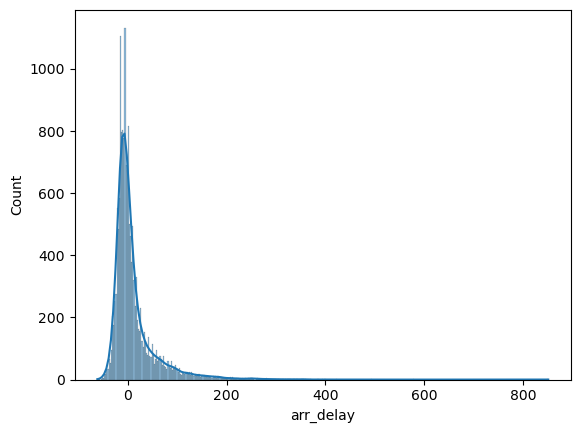

In [326]:
sns.histplot(flights, x="arr_delay", kde=True)
plt.show()

In [327]:
flights_sel = flights[['dep_delay', 'distance', 'carrier', 'origin', 'dest', 'hour', 'arr_delay']]

flights_sel = flights_sel.loc[(flights_sel['origin'] == 'EWR')|(flights_sel['origin'] == 'JFK')|(flights_sel['origin'] =='LGA')]
flights_sel = flights_sel.loc[(flights_sel['dest'] == 'IAD')|(flights_sel['dest'] == 'BWI')|(flights_sel['dest'] == 'DCA')]

In [328]:
f=flights_sel.copy()
flights_sel = flights_sel.dropna()
fly=flights_sel.pop('arr_delay')
print("Arrival Delays:")
fly

Arrival Delays:


0        -19.0
1        851.0
2        -14.0
3         -4.0
4         -3.0
         ...  
17161     36.0
17162      8.0
17163     -9.0
17164    -27.0
17165    195.0
Name: arr_delay, Length: 16164, dtype: float64

In [329]:
f = flights_sel
f = pd.get_dummies(f)
f

,dep_delay,distance,hour,carrier_9E,carrier_B6,carrier_DL,carrier_EV,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA,dest_BWI,dest_DCA,dest_IAD
0,-1.0,185,6.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
1,853.0,184,8.0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
2,-1.0,185,10.0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,-2.0,169,11.0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
4,2.0,169,13.0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,53.0,229,11.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
17162,0.0,228,14.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
17163,-2.0,229,14.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
17164,-7.0,228,14.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [330]:
from sklearn.model_selection import train_test_split
f_train,f_test,fly_train,fly_test = train_test_split(f,fly,test_size=0.20,random_state=2)
regr = LinearRegression()
regr.fit(f_train,fly_train)
print("Score:",regr.score(f_test,fly_test))

Score: 0.8820183421117882


**Question/Task 5**
Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [331]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [332]:
test_data=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights_test_data.xlsx')
test_data.head(5)

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229
2,2013,2,11,MQ,JFK,DCA,213
3,2013,4,14,US,LGA,DCA,214
4,2013,4,29,EV,LGA,IAD,229


In [333]:
flight_data=pd.read_excel('https://raw.githubusercontent.com/Praveen91004/Data601/main/flights2DCMDVA.xlsx')
flight_data.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0


In [334]:
flight_data.loc[flight_data.dep_time.isna(),'cancelled']=1
flight_data=flight_data.fillna(0)
flight_data=flight_data[['year', 'month', 'day', 'carrier', 'origin', 'dest', 'distance', 'cancelled']]
flight_data.head(5)

,year,month,day,carrier,origin,dest,distance,cancelled
0,2013,1,1,WN,LGA,BWI,185,0.0
1,2013,1,1,MQ,JFK,BWI,184,0.0
2,2013,1,1,WN,LGA,BWI,185,0.0
3,2013,1,1,WN,EWR,BWI,169,0.0
4,2013,1,1,EV,EWR,BWI,169,0.0


In [335]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [336]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X = flight_data.drop('cancelled', axis=1)
y = flight_data['cancelled']
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
X=X_resampled
y=y_resampled

In [337]:
y=flight_data.pop('cancelled')
X=flight_data

In [338]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

X['Carrier']= label_encoder.fit_transform(X['carrier'])
X['origin']= label_encoder.fit_transform(X['origin'])
X['dest']= label_encoder.fit_transform(X['dest'])

In [339]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
X = encoder.fit_transform(X)
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X, y)

LogisticRegression(random_state=0, solver='liblinear')

In [340]:
test_data['carrier']= label_encoder.fit_transform(test_data['carrier'])
test_data['origin']= label_encoder.fit_transform(test_data['origin'])
test_data['dest']= label_encoder.fit_transform(test_data['dest'])

In [341]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X, y)
predictions = classifier.predict(X)
classifier.predict(X)

array([0., 0., 0., ..., 0., 0., 0.])

In [342]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print(accuracy)

0.9455445544554455
